In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [6]:
file = '/home/ck/DIR/cornkle/data/NFLICS/cell_stats14.2_n18_15.2_n16_Unique_msg9_cell_mean_cellthresh_n70_cellpixlt_n70_freq_mean_00000_refhours_18_21.csv' 

In [7]:
tab = pd.read_table(file, parse_dates=True, delimiter=',')

In [8]:
test= tab[tab.time==tab.time[0]]
test.com_lon.values

array([26.])

In [9]:
tab

,time,com_lon,com_lat,cell_min_T,cell_mean_T,cell_area_km2
0,2004-08-07 20:00:00,26.0,235.0,-83.0,-74.0,8067.97
1,2005-08-19 18:00:00,19.0,232.0,-79.0,-74.0,18732.42
2,2005-08-29 20:00:00,11.0,240.0,-84.0,-74.0,16755.44
3,2006-07-24 19:00:00,28.0,224.0,-86.0,-76.0,6564.46
4,2006-07-26 18:00:00,13.0,253.0,-84.0,-75.0,12379.89
5,2006-08-12 18:00:00,21.0,252.0,-80.0,-74.0,10431.65
6,2006-09-07 18:00:00,28.0,224.0,-78.0,-74.0,8965.96
7,2007-07-17 18:00:00,24.0,244.0,-87.0,-76.0,9453.58
8,2007-07-25 18:00:00,30.0,234.0,-83.0,-74.0,13388.85
9,2007-08-02 21:00:00,28.0,237.0,-80.0,-74.0,13366.93


In [10]:
pd.to_datetime(tab.time.values[0]).month

8

In [ ]:
def cut_kernel(xpos, ypos, arr, date, lon, lat):

    #AMSRE 0.25 degrees ~ 27.5 km
    dist = 10

    kernel = u_arrays.cut_kernel(arr,xpos, ypos,dist)


    # if (np.sum(np.isfinite(kernel)) < 0.10 * kernel.size):
    #     return

    kernel3 = kernel - np.nanmean(kernel)

    cnt = np.zeros_like(kernel)
    cnt[np.isfinite(kernel)] = 1

    if kernel.shape != (dist*2+1, dist*2+1):
        return None

    return kernel, kernel3, cnt

In [ ]:
def run(shift):

    kernel2_list = []
    kernel3_list = []
    cnt_list = []


    for date in tab.time:


        single = tab[tab.time==date]

        dt = pd.to_datetime(date)
        daystring = str(abs(shift))
        dayd = pd.Timedelta(daystring + 'days')
        if shift < 0:
            dt = dt - dayd
        if shift >=0:
            dt = dt + dayd
        
        #ipdb.set_trace()
        fdate = str(dt.year) + str(dt.month).zfill(2) + str(dt.day).zfill(2)

        try:

            lsta = xr.open_dataset(cnst.AMSRE_ANO_DAY + 'sma_' + fdate + '.nc') #sma  #'AMSR_L3_LPRMv05_A_'

        except:
            try:
                lsta = xr.open_dataset(cnst.AMSRE_ANO_NIGHT + 'sma_' + fdate + '.nc')
                print('AMSR night')
            except:
                continue

        testbox = lsta['SM'].sel(lon=slice(-19, -14), lat=slice(12, 16.5)).values

        if np.isnan(testbox).all():
            try:
                lsta = xr.open_dataset(cnst.AMSRE_ANO_NIGHT + 'sma_' + fdate + '.nc') 
                print('AMSR night')
            except:
                print('AMSR night fail')
                continue

            testbox = lsta['SM'].sel(lon=slice(-19, -14), lat=slice(12, 16.5)).values
            print('AMSR night')
            if np.isnan(testbox).all():
                print('AMSR night fail')
                continue

        lsta = lsta.sel(lon=slice(-19, -7), lat=slice(9, 25))    
        lsta = lsta.sel(time=str(dt.year)+'-'+str(dt.month)+'-'+str(dt.day))



        lsta_da = lsta['SM'].squeeze()
    #     booleans = np.zeros_like(lsta_da.values) * np.nan
    #     booleans[lsta_da.values>4] = 1
    #     booleans[lsta_da.values<-4] = -1

        #lsta_da.values = booleans


    #     point = lsta_da.sel(lat=single.com_lat.values, lon=single.com_lon.values, method='nearest')
    #     if np.isnan(point.values):
    #         continue



        print('Doing '+ 'AMSR_' + str(dt.year) + str(dt.month).zfill(2) + str(
        dt.day).zfill(2) + '.nc')
    #     plat = point['lat'].values
    #     plon = point['lon'].values

    #     xpos = np.where(lsta_da['lon'].values == plon)
    #     xpos = int(xpos[0])
    #     ypos = np.where(lsta_da['lat'].values == plat)
    #     ypos = int(ypos[0])


    #     try:
    #         rkernel2, rkernel3, rcnt = cut_kernel(xpos, ypos, lsta_da, dt, plon, plat)
    #     except TypeError:
    #         continue

        cnt = np.zeros_like(lsta_da.values)
        cnt[np.isfinite(lsta_da.values)] = 1

        kernel2_list.append(lsta_da.values)
        kernel3_list.append(lsta_da.values- np.nanmean(lsta_da.values))
        cnt_list.append(cnt) 

        lat = lsta.lat.values
        lon = lsta.lon.values

    kernel2_sum = np.nansum(np.stack(kernel2_list, axis=0), axis=0)
    kernel3_sum = np.nansum(np.stack(kernel3_list, axis=0), axis=0)
    cnt_sum = np.nansum(np.stack(cnt_list, axis=0), axis=0)
    return kernel2_sum, kernel3_sum, cnt_sum, lsta_da

In [ ]:
ano, regional,cnt, da = run(-3)

In [ ]:
da

In [14]:
def draw_map(ax, t, lat, lon, title=''):
   
    plt.contourf(lon-0.3, lat, t, transform=ccrs.PlateCarree(), cmap='RdBu', levels=np.linspace(-2,2,6), extend='both')
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label('Volumetric soil moisture anomaly (%)')

In [ ]:
f = plt.figure(figsize=(15,11), dpi=300)

ax = f.add_subplot(331, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(-5)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day -5')

ax = f.add_subplot(332, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(-4)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day -4')


ax = f.add_subplot(333, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(-3)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day -3')

ax = f.add_subplot(334, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(-2)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day -2')

ax = f.add_subplot(335, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(-1)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day -1')

ax = f.add_subplot(336, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(0)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day 0')

ax = f.add_subplot(337, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(1)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day +1')

ax = f.add_subplot(338, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(2)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day +2')

ax = f.add_subplot(339, projection=ccrs.PlateCarree())
ano, regional,cnt, da = run(3)
draw_map(ax, ano/cnt, da.lat, da.lon, title='Day +3')


f.canvas.draw()
plt.tight_layout()
plt.savefig(cnst.network_data + 'figs/NFLICS/NFLICS_SManomaly_dakarstorms.png')

In [ ]:
def draw_map(t, lat, lon):
    f=plt.figure(figsize=(8,6), dpi=300)
    ax = f.add_subplot(111, projection=ccrs.PlateCarree())
    plt.contourf(lon-0.4, lat, t, transform=ccrs.PlateCarree(), cmap='viridis', extend='both', levels=np.arange(10,17))
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.title('')
    cbar = plt.colorbar()
    cbar.set_label('Valid storm cases')
    f.canvas.draw()
    plt.tight_layout()
    
    plt.savefig(cnst.network_data + 'figs/NFLICS/valid_cases.png')
    #plt.show()

In [ ]:
draw_map(cnt_sum, lat, lon)

In [21]:
def run_ERA5(shift, era_pl, era_srfc):

    kernel2_list = []
    kernel3_list = []
    cnt_list = []


    for date in tab.time:


        single = tab[tab.time==date]

        dt = pd.to_datetime(date)
        daystring = str(abs(shift))
        dayd = pd.Timedelta(daystring + 'days')
        if shift < 0:
            dt = dt - dayd
        if shift >=0:
            dt = dt + dayd
        
        #ipdb.set_trace()
        fdate = str(dt.year) + str(dt.month).zfill(2) + str(dt.day).zfill(2)+'T12'
       

        try:
            lsta_pl = era_pl.sel(time=fdate).isel(time=0)
        except (TypeError, IndexError, KeyError):
            print('Era missing:', date)
#             for k in dic.keys():
#                 dic[k].append(np.nan)
            continue
    
    
        lsta = era_srfc.sel(time=fdate).isel(time=0)

        lsta = lsta.sel(longitude=slice(-19, -7), latitude=slice(9, 25))    
        lsta_pl = lsta_pl.sel(longitude=slice(-19, -7), latitude=slice(9, 25)) 

        upper = lsta_pl['u'].sel(level=600)
        lower = lsta_pl['d'].sel(level=925)
        
        shear = lower*1000
        
        

        print('Doing '+ 'ERA5' + fdate + '.nc')

        cnt = np.zeros_like(upper.values)
        cnt[np.isfinite(upper.values)] = 1

        kernel2_list.append(shear.values)
        kernel3_list.append(shear.values- np.nanmean(shear.values))
        cnt_list.append(cnt) 

    kernel2_sum = np.nansum(np.stack(kernel2_list, axis=0), axis=0)
    kernel3_sum = np.nansum(np.stack(kernel3_list, axis=0), axis=0)
    cnt_sum = np.nansum(np.stack(cnt_list, axis=0), axis=0)
    return (kernel2_sum, kernel3_sum, cnt_sum, lsta)

In [4]:
era_pl = xr.open_mfdataset('/home/ck/DIR/mymachine/ERA5/pressure_levels/*.nc')
era_srfc = xr.open_mfdataset('/home/ck/DIR/mymachine/ERA5/surface/*.nc')
era_pl = u_darrays.flip_lat(era_pl)
era_srfc = u_darrays.flip_lat(era_srfc)

In [27]:
def draw_map(ax, t, lat, lon, title=''):
   
    plt.contourf(lon-0.3, lat, t, transform=ccrs.PlateCarree(), cmap='RdBu', levels=np.linspace(-1,1,8), extend='both')
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label('Wind shear 600-925hPa (mm s-1)')

In [23]:
collect = []
for i in range(-5,4):
    collect.append(run_ERA5(i, era_pl, era_srfc))

Doing ERA520040802T12.nc
Doing ERA520050814T12.nc
Doing ERA520050824T12.nc
Doing ERA520060719T12.nc
Doing ERA520060721T12.nc
Doing ERA520060807T12.nc
Doing ERA520060902T12.nc
Doing ERA520070712T12.nc
Doing ERA520070720T12.nc
Doing ERA520070728T12.nc
Doing ERA520070818T12.nc
Doing ERA520070901T12.nc
Doing ERA520070907T12.nc
Doing ERA520070912T12.nc
Doing ERA520080724T12.nc
Doing ERA520080802T12.nc
Doing ERA520080804T12.nc
Doing ERA520090803T12.nc
Doing ERA520090819T12.nc
Doing ERA520090823T12.nc
Doing ERA520100826T12.nc
Doing ERA520110729T12.nc
Doing ERA520110813T12.nc
Doing ERA520110907T12.nc
Doing ERA520120627T12.nc
Doing ERA520120707T12.nc
Doing ERA520120821T12.nc
Doing ERA520120830T12.nc
Doing ERA520120901T12.nc
Doing ERA520120902T12.nc
Doing ERA520130801T12.nc
Doing ERA520130802T12.nc
Doing ERA520130912T12.nc
Doing ERA520140821T12.nc
Doing ERA520140822T12.nc
Doing ERA520140823T12.nc
Doing ERA520140904T12.nc
Doing ERA520140911T12.nc
Era missing: 2015-07-25 19:00:00
Era missing: 2015

Doing ERA520050821T12.nc
Doing ERA520050831T12.nc
Doing ERA520060726T12.nc
Doing ERA520060728T12.nc
Doing ERA520060814T12.nc
Doing ERA520060909T12.nc
Doing ERA520070719T12.nc
Doing ERA520070727T12.nc
Doing ERA520070804T12.nc
Doing ERA520070825T12.nc
Doing ERA520070908T12.nc
Doing ERA520070914T12.nc
Doing ERA520070919T12.nc
Doing ERA520080731T12.nc
Doing ERA520080809T12.nc
Doing ERA520080811T12.nc
Doing ERA520090810T12.nc
Doing ERA520090826T12.nc
Doing ERA520090830T12.nc
Doing ERA520100902T12.nc
Doing ERA520110805T12.nc
Doing ERA520110820T12.nc
Doing ERA520110914T12.nc
Doing ERA520120704T12.nc
Doing ERA520120714T12.nc
Doing ERA520120828T12.nc
Doing ERA520120906T12.nc
Doing ERA520120908T12.nc
Doing ERA520120909T12.nc
Doing ERA520130808T12.nc
Doing ERA520130809T12.nc
Doing ERA520130919T12.nc
Doing ERA520140828T12.nc
Doing ERA520140829T12.nc
Doing ERA520140830T12.nc
Doing ERA520140911T12.nc
Doing ERA520140918T12.nc
Era missing: 2015-07-25 19:00:00
Era missing: 2015-07-27 21:00:00
Era missi

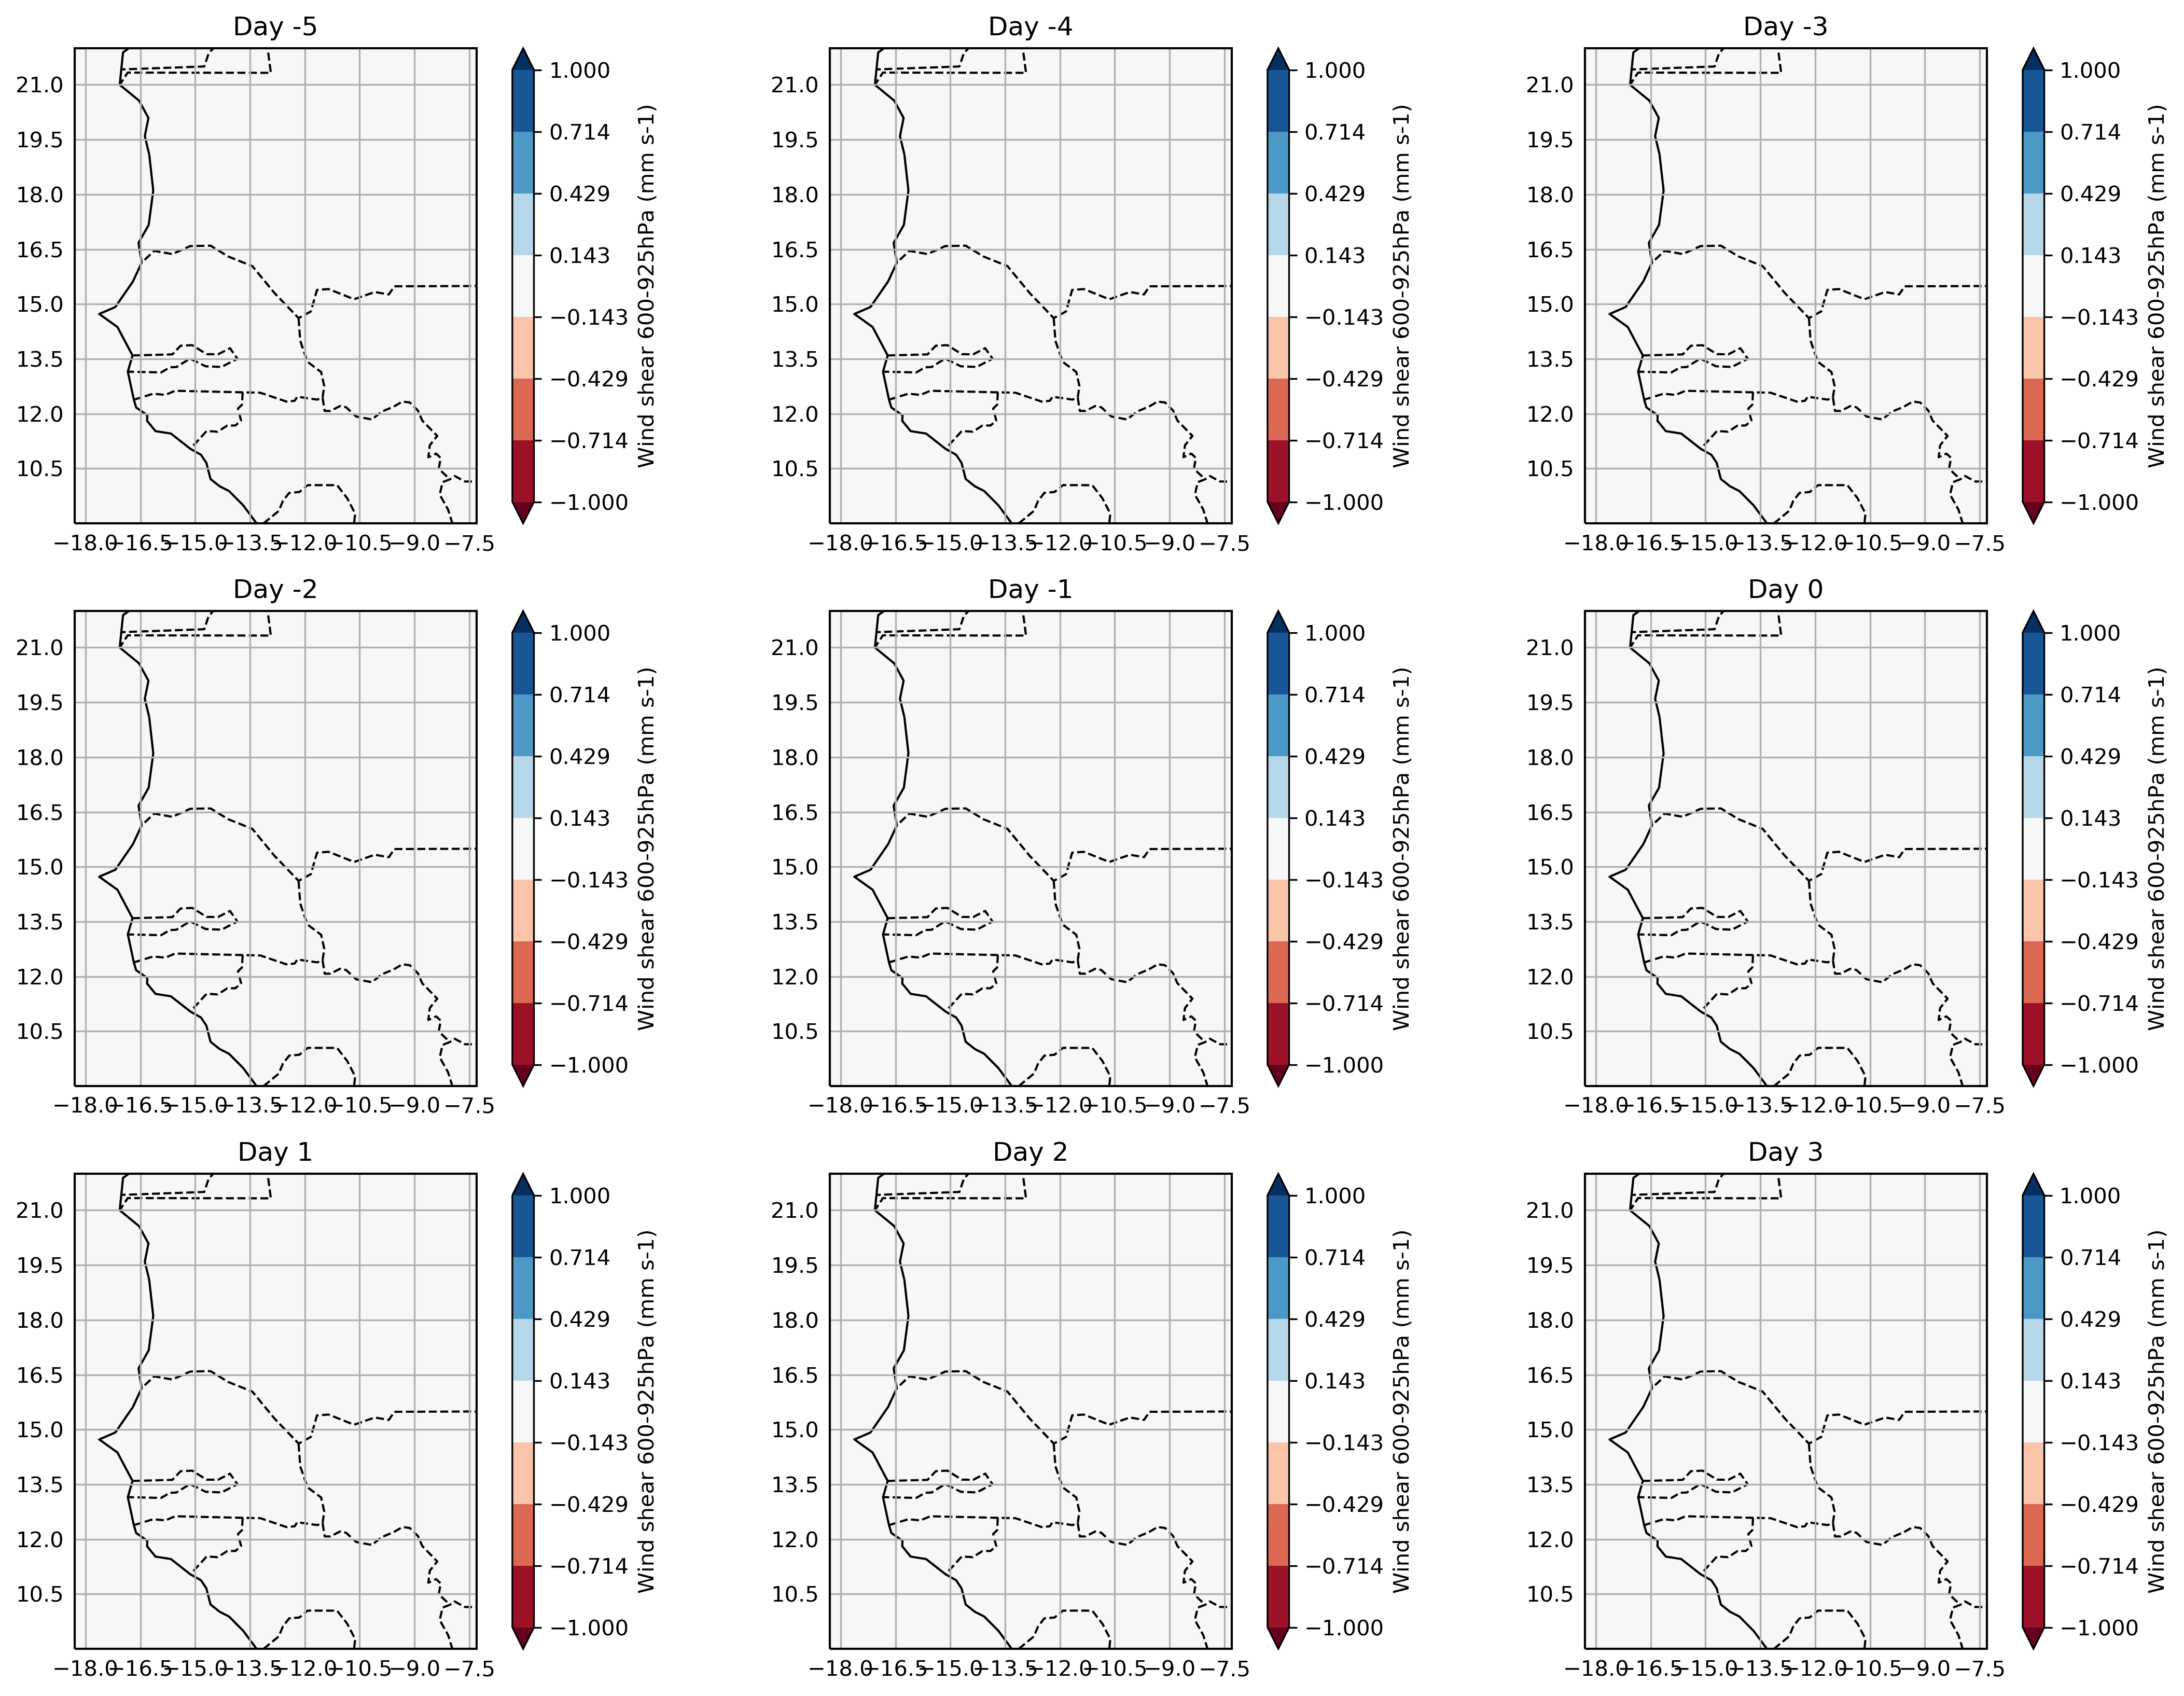

In [28]:
f = plt.figure(figsize=(15,11), dpi=300)

for ids, i in enumerate(range(-5, 4)):
    ax = f.add_subplot(3,3,ids+1, projection=ccrs.PlateCarree())
    ano, regional, cnt, da = collect[ids]
    draw_map(ax, ano/cnt, da.latitude, da.longitude, title='Day '+ str(i))


f.canvas.draw()
plt.tight_layout()
plt.savefig(cnst.network_data + 'figs/NFLICS/NFLICS_SManomaly_dakarstorms_ERA5.png')